In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# Lectura de los datos.

La base de datos tiene 19362 pacientes con su respectiva medición física (edad, peso, altura, genero, presión arterial...), su comportamiento ( nivel de ejercicio, si fuma, si bebe...) como variables de categoria la variable respuesta si esta medicado o no. en total se tienen 22 variables, una matriz de 19362*22  

In [8]:
dfgrande=pd.read_csv('/Users/lescobar/Desktop/Proyecto Integrador/data/working_dataset.csv', index_col="patient_id")
dfgrande.head()


,treatment,birth_date,start_date,start_night,end_night,gender,height,weight,age,smoking,...,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_output,cardiac_index,systemic_vascular_resistance,pulse_wave_velocity
patient_id,,,,,,,,,,,,,,,,,,,,,
30,True,1983-12-25 00:00:00,2017-11-01 07:02:00,2017-10-27 04:30:00,2017-10-27 06:30:00,m,1.78,102.0,33.854327,0,...,120.457143,79.957143,72.685714,95.0,41.0,72.0,5.3,2.3,1158.0,5.7
31,False,1946-10-09 00:00:00,2017-11-01 08:40:00,2017-11-02 02:00:00,2017-11-02 04:00:00,m,1.67,82.4,71.064644,0,...,143.405405,91.067568,65.500000,111.0,52.0,83.0,5.4,2.8,1417.0,12.4
32,True,1960-02-14 00:00:00,2017-11-01 09:57:00,2017-11-02 03:00:00,2017-11-02 05:00:00,m,1.70,93.2,57.715030,0,...,122.557143,90.257143,80.628571,102.0,32.0,78.0,6.3,3.0,1319.0,9.0
33,False,1974-03-11 00:00:00,2017-11-01 10:17:00,2017-11-02 03:20:00,2017-11-02 05:20:00,f,1.60,61.3,43.645252,0,...,145.893939,93.863636,79.787879,113.0,52.0,86.0,6.9,4.2,1353.0,8.2
34,True,1996-06-26 00:00:00,2017-11-01 10:36:00,2017-11-02 04:30:00,2017-11-02 06:30:00,m,1.73,72.3,21.350970,0,...,130.376812,82.739130,77.913043,100.0,48.0,78.0,6.0,3.2,1172.0,5.3


# Ajuste de las columnas.

Todas las variables para este análisis deben ser numéricas y la única que no cumple esta condición es 'gender' que esta como 'male' o 'female'.
Tambien se escogieron solo las variables continuas para continuar con el análisis de outliers multivariable y así usar la distancia de Mahalanobis, quedando solo asi las variables abajo expresadas.

In [9]:
dfgrande = dfgrande[['height','weight','age','sistolic','diastolic','heart_rate','mean_arterial_pressure','pulse_pressure','stroke_volume','cardiac_index','systemic_vascular_resistance','pulse_wave_velocity']]
dfgrande.head()

,height,weight,age,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_index,systemic_vascular_resistance,pulse_wave_velocity
patient_id,,,,,,,,,,,,
30,1.78,102.0,33.854327,120.457143,79.957143,72.685714,95.0,41.0,72.0,2.3,1158.0,5.7
31,1.67,82.4,71.064644,143.405405,91.067568,65.500000,111.0,52.0,83.0,2.8,1417.0,12.4
32,1.70,93.2,57.715030,122.557143,90.257143,80.628571,102.0,32.0,78.0,3.0,1319.0,9.0
33,1.60,61.3,43.645252,145.893939,93.863636,79.787879,113.0,52.0,86.0,4.2,1353.0,8.2
34,1.73,72.3,21.350970,130.376812,82.739130,77.913043,100.0,48.0,78.0,3.2,1172.0,5.3


# Resumen estadístico.

Se hace el resumen de este conjunto de datos para ver el comportamiento individual de las variables, sin embargo acá no se pueden sacar outliers de manera individual. La estrategia es calcular la distancia de Mahalanobis de todas las características con respecto a un centro hipotético de los datos.    

In [10]:
# resumen estadistico con pandas
dfgrande.describe()

,height,weight,age,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_index,systemic_vascular_resistance,pulse_wave_velocity
count,19605.000000,19605.000000,19605.000000,19605.000000,19605.000000,19605.000000,19605.000000,19605.000000,19605.000000,19605.000000,19605.000000,19605.000000
mean,1.640794,74.566866,54.712767,130.040645,82.437316,74.147577,100.021933,47.601428,77.474981,3.178363,1276.885080,8.702775
std,0.099304,14.961196,15.413501,13.312755,8.705985,9.602712,9.627527,9.641750,6.168223,0.647880,79.418913,2.408022
min,0.620000,30.000000,0.003202,87.281250,48.770492,38.375000,64.000000,25.000000,55.000000,1.100000,772.000000,4.000000
25%,1.570000,64.000000,43.105658,120.986486,76.657534,67.632353,94.000000,41.000000,73.000000,2.700000,1228.000000,6.900000
50%,1.640000,73.000000,55.455402,128.640000,82.095890,73.818182,99.000000,46.000000,77.000000,3.100000,1279.000000,8.400000
75%,1.710000,84.000000,65.607523,137.444444,87.736111,80.430380,106.000000,52.000000,81.000000,3.600000,1327.000000,10.000000
max,3.020000,190.000000,97.460391,220.700000,134.627907,135.012987,160.000000,134.000000,110.000000,7.600000,1812.000000,24.100000


# Calcular los scores de distribución normal.

Como se tienen diferentes caracterisiticas con diferentes unidades: m, kg, mmHg lo mejor es dejar el conjunto adimensional y esto se logra con el Z-score, que tiene dos objetivos: normaliza las variables y las deja adimensionales. 

Para esto se usó un lazo -for- que le resta el promedio por columna a cada valor fila y luego lo divide por la desviación estandar de cada columna. 

In [11]:
cols = list(dfgrande.columns)
dfgrande[cols].head()

,height,weight,age,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_index,systemic_vascular_resistance,pulse_wave_velocity
patient_id,,,,,,,,,,,,
30,1.78,102.0,33.854327,120.457143,79.957143,72.685714,95.0,41.0,72.0,2.3,1158.0,5.7
31,1.67,82.4,71.064644,143.405405,91.067568,65.500000,111.0,52.0,83.0,2.8,1417.0,12.4
32,1.70,93.2,57.715030,122.557143,90.257143,80.628571,102.0,32.0,78.0,3.0,1319.0,9.0
33,1.60,61.3,43.645252,145.893939,93.863636,79.787879,113.0,52.0,86.0,4.2,1353.0,8.2
34,1.73,72.3,21.350970,130.376812,82.739130,77.913043,100.0,48.0,78.0,3.2,1172.0,5.3


In [12]:
for col in cols:  
    col_zscore = col + '_zscore'
    dfgrande[col_zscore] = (dfgrande[col] - dfgrande[col].mean())/dfgrande[col].std(ddof=0)
dfgrande.head()

,height,weight,age,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_index,...,age_zscore,sistolic_zscore,diastolic_zscore,heart_rate_zscore,mean_arterial_pressure_zscore,pulse_pressure_zscore,stroke_volume_zscore,cardiac_index_zscore,systemic_vascular_resistance_zscore,pulse_wave_velocity_zscore
patient_id,,,,,,,,,,,,,,,,,,,,,
30,1.78,102.0,33.854327,120.457143,79.957143,72.685714,95.0,41.0,72.0,2.3,...,-1.353292,-0.719892,-0.284889,-0.152238,-0.521636,-0.684689,-0.887633,-1.355784,-1.496975,-1.247020
31,1.67,82.4,71.064644,143.405405,91.067568,65.500000,111.0,52.0,83.0,2.8,...,1.060907,1.003932,0.991326,-0.900558,1.140308,0.456212,0.895746,-0.584016,1.764296,1.535417
32,1.70,93.2,57.715030,122.557143,90.257143,80.628571,102.0,32.0,78.0,3.0,...,0.194786,-0.562145,0.898236,0.674930,0.205465,-1.618153,0.085119,-0.275309,0.530302,0.123434
33,1.60,61.3,43.645252,145.893939,93.863636,79.787879,113.0,52.0,86.0,4.2,...,-0.718059,1.190865,1.312501,0.587381,1.348051,0.456212,1.382122,1.576934,0.958422,-0.208797
34,1.73,72.3,21.350970,130.376812,82.739130,77.913043,100.0,48.0,78.0,3.2,...,-2.164508,0.025252,0.034668,0.392135,-0.002278,0.041339,0.085119,0.033398,-1.320690,-1.413135


In [13]:
# la misma matriz pero estandarizada para detectar los pacientes 'outliers'.
dfgrandez = dfgrande[['height_zscore','weight_zscore','age_zscore','sistolic_zscore','diastolic_zscore','heart_rate_zscore','mean_arterial_pressure_zscore','pulse_pressure_zscore','stroke_volume_zscore','cardiac_index_zscore','systemic_vascular_resistance_zscore','pulse_wave_velocity_zscore' ]]
dfgrandez.head()

,height_zscore,weight_zscore,age_zscore,sistolic_zscore,diastolic_zscore,heart_rate_zscore,mean_arterial_pressure_zscore,pulse_pressure_zscore,stroke_volume_zscore,cardiac_index_zscore,systemic_vascular_resistance_zscore,pulse_wave_velocity_zscore
patient_id,,,,,,,,,,,,
30,1.401844,1.833666,-1.353292,-0.719892,-0.284889,-0.152238,-0.521636,-0.684689,-0.887633,-1.355784,-1.496975,-1.247020
31,0.294111,0.523577,1.060907,1.003932,0.991326,-0.900558,1.140308,0.456212,0.895746,-0.584016,1.764296,1.535417
32,0.596220,1.245463,0.194786,-0.562145,0.898236,0.674930,0.205465,-1.618153,0.085119,-0.275309,0.530302,0.123434
33,-0.410810,-0.886774,-0.718059,1.190865,1.312501,0.587381,1.348051,0.456212,1.382122,1.576934,0.958422,-0.208797
34,0.898329,-0.151520,-2.164508,0.025252,0.034668,0.392135,-0.002278,0.041339,0.085119,0.033398,-1.320690,-1.413135


# Convertir a Array para trabajar.

Para trabajar los calculos con las matrices se usa numpy y por tanto las matrices y vectores deben estar como  array. 

In [14]:
#son los datos ya normalizados... pero sin las variables dummy 
data = np.array(dfgrandez)
#data = pd.read_csv('/Users/francolor/Desktop/presionz.csv').values[:,1:]
data.shape

(19605, 12)

# Calcular Mahalanobis robusto.

La matriz de covarianza de los datos tienen un determinante de 0 y su condición es 4.36*10^22 lo que indica que esta matriz esta mal condicionada y por tanto no tiene inversa y la solución es usar un método robusto (Minimun Covariance Determinant ) para el calculo de la covarianza y su inversa. 

El método calcula el promedio y la covarianza con la parte mas central de la data y luego si calcula la distancia de Mahalanobis, esto permite una mejor remoción de outliers que la distancia de Mahalanobis tradicional y ya esta implementado en muchos paquetes estadísticos. 

Hubert, M et al. Minimum covariance determinant and extensions. DOI: 10.1002/wics.1421, 2017 

In [15]:
from sklearn.covariance import MinCovDet
# fit a Minimum Covariance Determinant (MCD) robust estimator to data 
robust_cov = MinCovDet().fit(data)

In [16]:
# Get the Mahalanobis distance
m = robust_cov.mahalanobis(data)
m

array([ 21.66335845,  33.54638698,  16.00340693, ..., 527.07213218,
        88.07038595,  17.41507692])

# Boxplot para la distancia de Mahalanobis. 

El boxplot de las distancias de Mahalanobis permite ver graficamente los outliers, gracias a que todas las características se convirtieron en una sola-  y definir el criterio para sacarlos. El criterio que define un outlier es que este por encima del límite=p75+1.5*(p75-p25).

In [17]:
min=np.amin(m)
max=np.amax(m)
max 

4641.953036099403

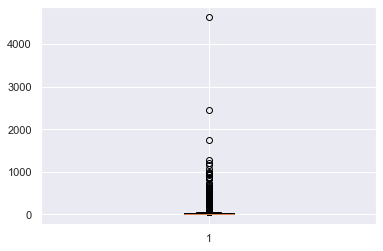

In [18]:
plt.boxplot(m)
plt.show()

# La lista de los outliers. 

Acá se aplica el límite para separar los outliers y dejar la matriz de datos lista para trabajar, en total se retirarian 1961 pacientes del estudio y el array indica su posición en los datos originales.

In [19]:
p25 = np.percentile(m, 25)
p75 = np.percentile(m, 75)
limite=p75+1.5*(p75-p25)
p90 =np.percentile(m, 90)
limite=p75+1.5*(p75-p25) 


In [20]:
result = np.where(m > p90)
len(result[0])


1961

# Retirar los outliers y volver a la base de datos con todas las variables. 

In [21]:
#aca falta quitar los outliers de dfgrande ( la del comienzo.. ) y de 'm' para hacer otra vez la gráfica boxplot.

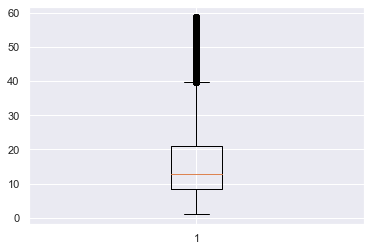

In [22]:
m_filtered = m[[index for index in range(0,len(m) -1) if not(index in result[0])]]
plt.boxplot(m_filtered)
plt.show()

In [23]:
dfgrande = pd.read_csv('/Users/lescobar/Desktop/Proyecto Integrador/data/working_dataset.csv', index_col="patient_id")
dffinal = dfgrande.drop(dfgrande.iloc[result].index)
dffinal
#box_plot_data=[mlimpio]
#plt.boxplot(box_plot_data)
#plt.show()

,treatment,birth_date,start_date,start_night,end_night,gender,height,weight,age,smoking,...,sistolic,diastolic,heart_rate,mean_arterial_pressure,pulse_pressure,stroke_volume,cardiac_output,cardiac_index,systemic_vascular_resistance,pulse_wave_velocity
patient_id,,,,,,,,,,,,,,,,,,,,,
30,True,1983-12-25 00:00:00,2017-11-01 07:02:00,2017-10-27 04:30:00,2017-10-27 06:30:00,m,1.78,102.0,33.854327,0,...,120.457143,79.957143,72.685714,95.0,41.0,72.0,5.3,2.3,1158.0,5.7
31,False,1946-10-09 00:00:00,2017-11-01 08:40:00,2017-11-02 02:00:00,2017-11-02 04:00:00,m,1.67,82.4,71.064644,0,...,143.405405,91.067568,65.500000,111.0,52.0,83.0,5.4,2.8,1417.0,12.4
32,True,1960-02-14 00:00:00,2017-11-01 09:57:00,2017-11-02 03:00:00,2017-11-02 05:00:00,m,1.70,93.2,57.715030,0,...,122.557143,90.257143,80.628571,102.0,32.0,78.0,6.3,3.0,1319.0,9.0
33,False,1974-03-11 00:00:00,2017-11-01 10:17:00,2017-11-02 03:20:00,2017-11-02 05:20:00,f,1.60,61.3,43.645252,0,...,145.893939,93.863636,79.787879,113.0,52.0,86.0,6.9,4.2,1353.0,8.2
34,True,1996-06-26 00:00:00,2017-11-01 10:36:00,2017-11-02 04:30:00,2017-11-02 06:30:00,m,1.73,72.3,21.350970,0,...,130.376812,82.739130,77.913043,100.0,48.0,78.0,6.0,3.2,1172.0,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20167,False,1966-12-23 00:00:00,2020-03-19 02:22:00,2020-03-19 22:00:00,2020-03-20 07:00:00,f,1.58,92.0,53.237779,0,...,138.567164,84.671642,81.298507,105.0,54.0,82.0,6.7,3.3,1244.0,8.0
20169,False,1983-08-11 00:00:00,2020-03-19 02:39:00,2020-03-19 22:40:00,2020-03-20 07:30:00,m,1.70,73.0,36.605367,0,...,116.902778,78.847222,73.513889,92.0,38.0,71.0,5.2,2.8,1172.0,5.7
20170,False,1974-04-15 00:00:00,2020-03-19 03:08:00,2020-03-19 21:40:00,2020-03-20 05:00:00,m,1.78,88.0,45.927804,0,...,128.328947,86.013158,77.013158,102.0,42.0,78.0,6.0,2.9,1258.0,7.0


In [24]:
dffinal.to_csv("data/filtered_dataset.csv")